### 0. 전체적인 내용 정리..


- 오류 1. Kernel crashes
https://github.com/microsoft/vscode-jupyter/wiki/Kernel-crashes  
여기에 여러가지 이유가 나와있지만, 나는 import 코드들과 값이 나오는 코드들을 따로 적어주었더니 해결이 되었다.
<br><br>
- 코드 읽다가 이해안되는 부분은 ? 붙여 놓았으니 ? 찾아서 영상보고 다시 공부
<br><br>
- pytorch를 설치한 후 MINST data를 이용해 예제를 실행해봤다.<br><br>
사용한 torch의 함수
    - nn : Nureal Network
    - nn.functional as F : loss와 같은 functional 함수들
    - optim : optimizer로, 무조건 있어야 하는 함수이다.
    - from torchvision import datasets, transforms : 데이터셋과 변형하는 함수
    - from torch.optim.lr_scheduler import StepLR : Learning Rate(경사 하강법에서 보폭의 크기)를 변경해주는 스케일러로, optimizer의 보조역할을 한다. 
    <br><br>
이미지는 컴퓨터 학습을 위해 숫자로 바꿔줘야 한다. ( 그 과정에서 transforms.Compose를 사용)
<br><br>
0~9까지 숫자를 분류했다. activation은 Softmax 

# 1. pytorch 2.x으로 설치하기


실습하기에 앞서 파이토치 2.x으로 설치 필요!   
Colab에서는 바로 사용할 수 있다.

https://pytorch.org/examples/

In [3]:
import torch


In [4]:

torch.__version__

'2.0.1+cu117'

파이토치는 cpu, gpu 모두 사용할 수 있으며,  
colab의 경우 기본적으로 gpu가 설치된 버전으로 사용이 가능  
torch 버전을 출력해보면 나오는 버전+환경을 통해 확인이 가능하다.

In [5]:
# pytorch에서 사용할 함수들 호출하기
import torch.nn as nn # Nureal Network
import torch.nn.functional as F # Loss와 같은 Functional 함수들
import torch.optim as optim # optimizer, 이건 무조건 있어야한다.
from torchvision import datasets, transforms # 데이터셋, 변형, 이건 잘 안쓸 듯
from torch.optim.lr_scheduler import StepLR # 러닝레이트 변경해주는 스케줄러 (optimizer 보조역할 -lr 조정) 레퍼런스 찾아보면 더 괜찮은것들 많습니다.

먼저, datasets안에 들어있는 몇 가지 예제 데이터들 중에,  
fashion_mnist 데이터를 사용해보겠습니다.

In [6]:
train_dataset = datasets.MNIST('./data', train=True, download=True) # train 을 False로 두면 Test를 가져온다잉

pytorch 데이터셋의 경우 PIL.Image와 라벨로 이루어져 있다

In [5]:
len(train_dataset)

60000

In [6]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
train_dataset[0][0]

In [7]:
import numpy as np

In [8]:

unique_class = np.unique([label for img, label in train_dataset])
print(unique_class)
len(unique_class)

[0 1 2 3 4 5 6 7 8 9]


10

지금은 이미지로 보이지만, 컴퓨터를 학습시키기 위해선 숫자로 바꿔주는 과정이 필요하다.

In [9]:
transform = transforms.Compose([
        transforms.ToTensor(), # 이미지를 tensor 자료형으로 변경
        transforms.Normalize((0.1307,), (0.3081,)) # 정규화 # ? 왜 범위가 저렇게 되었을까??
        ])

train_dataset.transform = transform

기본적으로 이미지를 tensor 자료형으로 변경할 경우  
한 이미지는 이미지 채널 수 (Gray or RGB), width, height 순의 배열로 나타난다.

In [11]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [10]:
import matplotlib.pyplot as plt

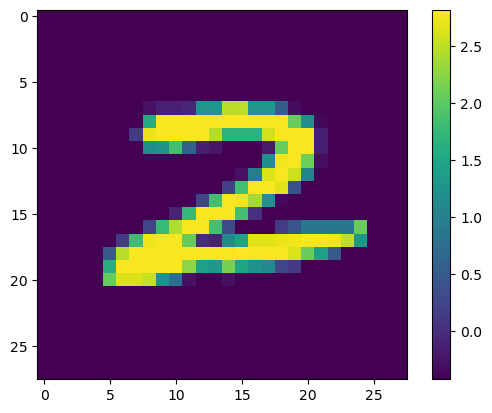

In [13]:

plt.figure()
plt.imshow(train_dataset[199][0].permute(1, 2, 0)) # width, height, color channels 순으로 들어와야한다.
# (C,W, H) -> permute(1,2,0) -> (W, H, C) 로 해준다. permute 쓰면 순서를 바꿔줄 수 있다 ? 이해가 안된다.
plt.colorbar()
plt.show()

pytorch의 데이터를 학습시키기 위해선 DataLoader로 바꿔주는 과정이 필요하다.  
참고로 dataset의 경우 데이터, 라벨로 이루어져 있어야 하고 iterable해야한다.

In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# batch_size : 한번에 학습을 시킬 데이터 갯수


In [15]:
train_dataset[0][1], train_dataset[0][0]

(5,
 tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0

In [19]:
plt.show()

# 숫자 이미지 예측하기

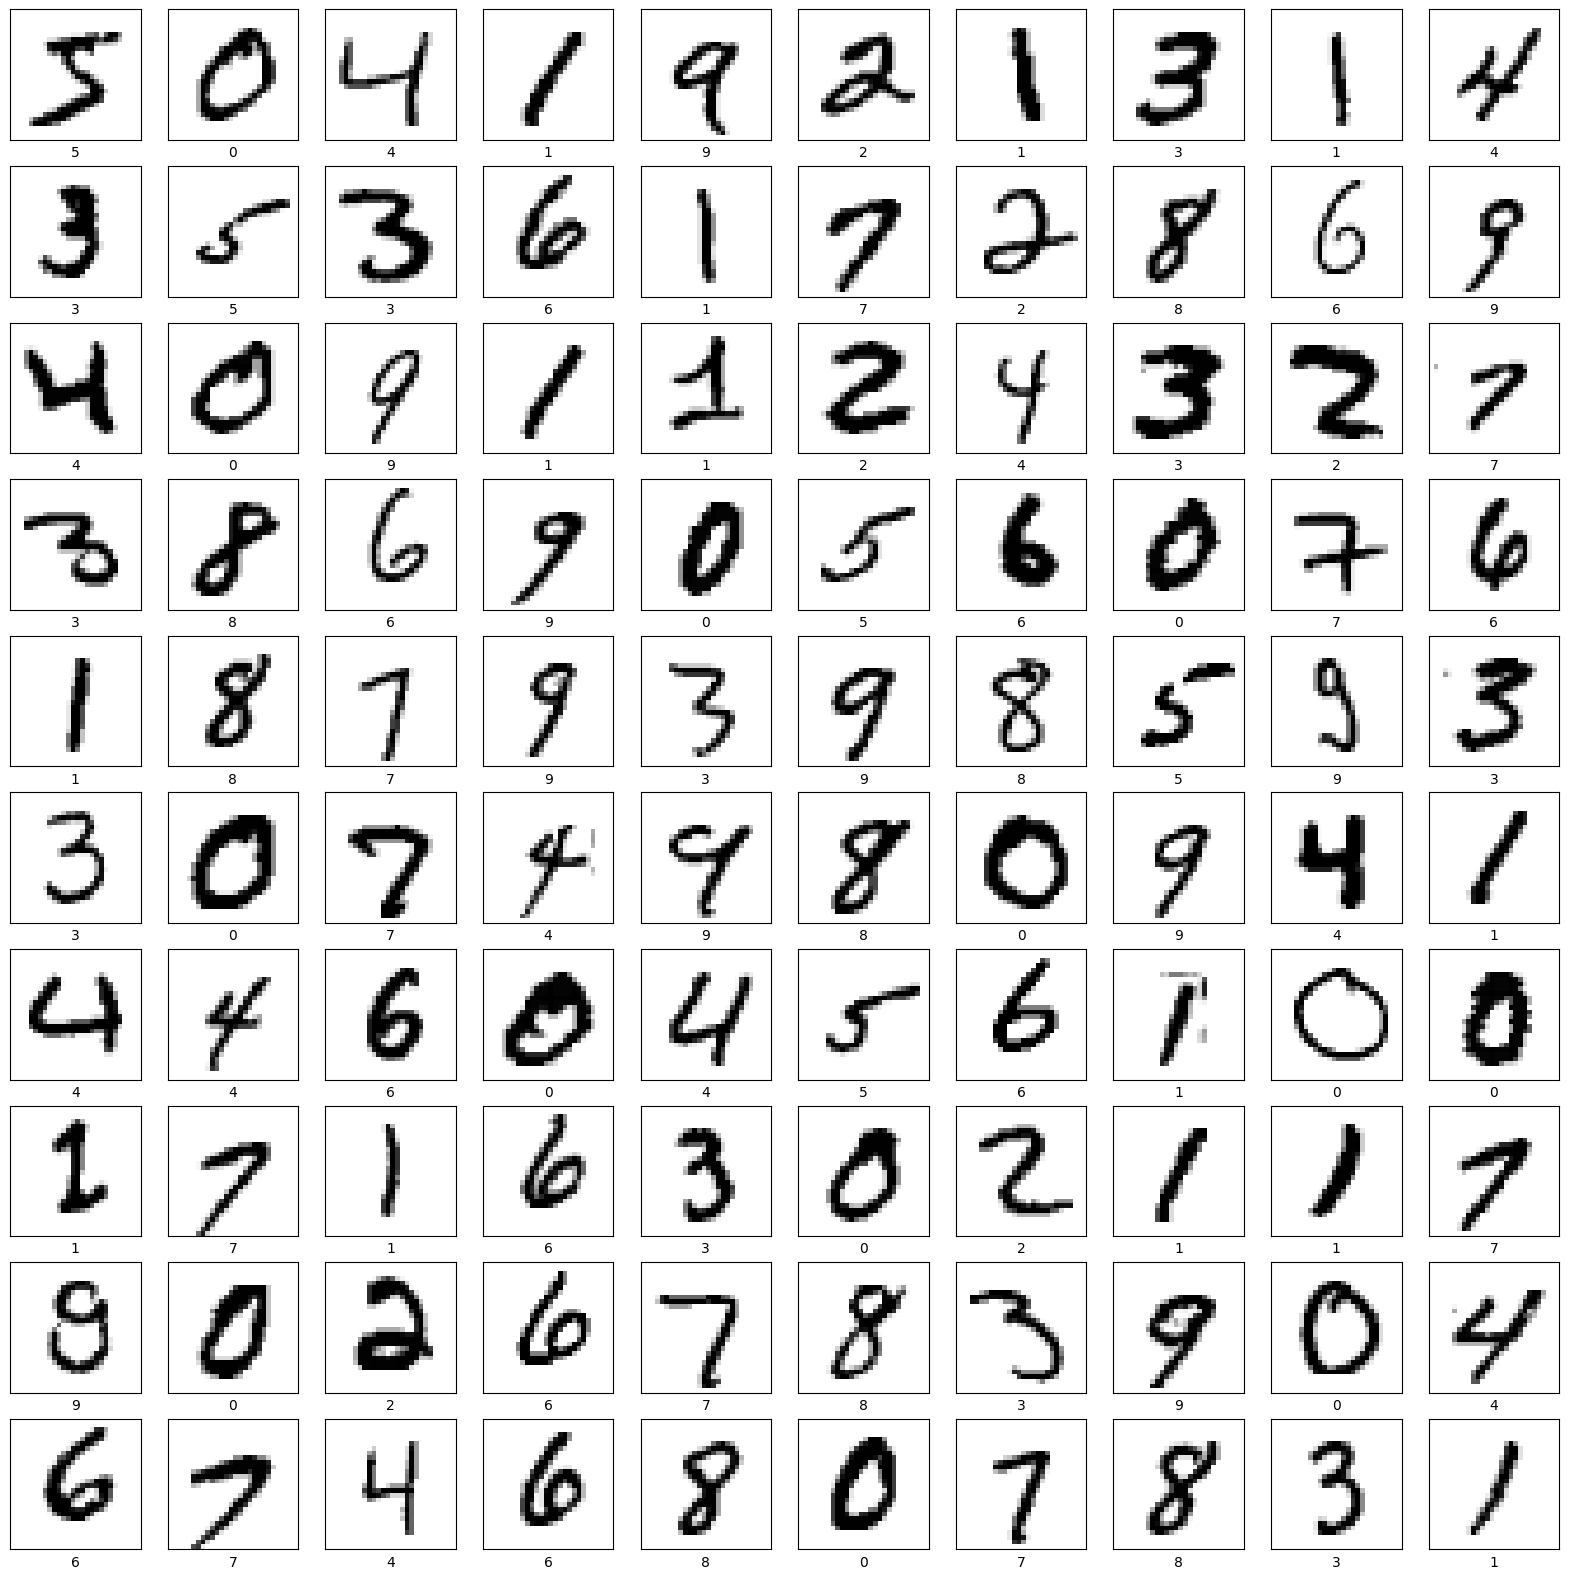

In [20]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i][0].reshape(28, 28, 1), cmap=plt.cm.binary)
    plt.xlabel(train_dataset[i][1])
plt.show()

테스트 데이터 정의

In [21]:
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

# torch.utils.data.DataLoader 는 학습 과정을 반복할 시행할 때마다 미니 배치를 하나씩 불러오는 함수이다.

### 모델 구축

In [27]:
# 기본 모델 = 완전연결계층 = Linear
class MyFirstModel(nn.Module): # 모델 생성
    def __init__(self, num_classes=10):
        super(MyFirstModel, self).__init__() #상위 노드의 생성자 함수 실

        self.model = nn.Sequential(
            nn.Flatten(), # 2,3차원을 1차원으로 쭉 펴준 것 28,28 을 쭉 펴주니까 784임. input데이터의 피쳐 값이 되는거야!
            nn.Linear(784, 512), # input = 784 , output = 512 퍼셉트론(노드개수 512) 512는 임의로 정한 것
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128,num_classes), # 0-9까지 숫자 분류하는 거
            nn.Softmax() # 확률값 합이 1이 되도록 activation function은 문제에 맞게 설정한다. 
            #이진분류면 시그모이드 , 멀티이면 소프트 맥스, 선형이면 위쪽 nn.Linear에서끝
        )

    def forward(self, x): # feed forward

        output = self.model(x)
        return output

In [30]:
# model = MyFirstModel(num_classes =20) # 이런식으로 클래스를 유연하게 쓴다.
model = MyFirstModel(num_classes =10)

### 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 필요합니다.:

모델을 device로 이동 - 훈련 시 모델을 cpu, gpu로 이동시킵니다.  
옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.  
스케줄러(Scheduler)-학습률을 학습이 진행됨에 따라 적절한 값으로 변경하기 위해 사용합니다.


In [31]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

optimizer = optim.Adadelta(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

# 1.0*0.7 = 0.7 lr를 줄여주는 스케쥴러~
# cuda = GPU 연산

### 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
model을 학습 상태로 변경합니다. (가중치 업데이트 가능한 상태)  
dataloader에서 뽑은 배치 사이즈만큼의 훈련 데이터를 device로 이동시킵니다.  

훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.  

테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다.  
이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.  

Epoch : dataset 반복 횟수  
예를 들어,  
책 몇번 봤어? == 책 몇 epoch 돌렸어?  


손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다.  
모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.  

In [32]:
# ?? 이부분은 영상보고 복습해야 할 듯 ??

epochs = 10
dry_run = False # 1 배치만 훈련 ?? 이게 뭐지??

for epoch in range(1, epochs+1):
    # 학습
    model.train() # 학습상태로 바꿔주고
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # 기울기를 0으로 초기화, 안하면 그 전 기울기가 남아있음./
            #W -= learning_rate * gradient 에서 gradient를 초기화하고 다시 계산되게 하는 것임.

        output = model(data) # 모델 데이터에서 결과를 뽑는다.
        loss = F.nll_loss(output, target) # 내가 예측한 값과 실제 값의 loss를 구한다.
        loss.backward() # 이때 gradient가 계산됨
        optimizer.step() # weight를 일제히 업데이트, 여기까지가 하나의 학습단계, 여기까지 거의 고정적으로 쓰인다.

        if batch_idx % 100 == 0: # 만약 데이터를 꺼낸게 100으로 나눴을 때 0이면 현재상태 출력
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

    # 테스트
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Epoch: 1 [0/60000 (0%)]	Loss: -0.102374
Train Epoch: 1 [3200/60000 (5%)]	Loss: -0.261921
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.425831
Train Epoch: 1 [9600/60000 (16%)]	Loss: -0.574489
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.764204
Train Epoch: 1 [16000/60000 (27%)]	Loss: -0.750445
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.807983
Train Epoch: 1 [22400/60000 (37%)]	Loss: -0.727738
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.749190
Train Epoch: 1 [28800/60000 (48%)]	Loss: -0.829866
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.798262
Train Epoch: 1 [35200/60000 (59%)]	Loss: -0.819162
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.853129
Train Epoch: 1 [41600/60000 (69%)]	Loss: -0.875025
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.878398
Train Epoch: 1 [48000/60000 (80%)]	Loss: -0.844353
Train Epoch: 1 [51200/60000 (85%)]	Loss: -0.874998
Train Epoch: 1 [54400/60000 (91%)]	Loss: -0.750002
Train Epoch: 1 [57600/60000 (96%)]	Loss: -0.874936

Test set: Average loss: -0.9015, Accura

# 의류 이미지 예측하기

In [ ]:
train_dataset = datasets.FashionMNIST('./fashion_data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST('./fashion_data', train=False, transform=transform)

**< dataset summary >**  
n_trainset = 60,000 / n_testset = 10,000  
1 image shape = 28 x 28 / 1 label shape = 1

In [ ]:
unique_class = np.unique([label for img, label in train_dataset])
print(unique_class)
len(unique_class)

데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_dataset[0][0].reshape(28, 28, 1))
plt.colorbar()
plt.show()

In [ ]:
label_names[train_dataset[0][1]]

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i][0].reshape(28, 28, 1), cmap=plt.cm.binary)
    plt.xlabel(label_names[train_dataset[i][1]])
plt.show()

### 모델 구축

In [ ]:
# 기본 모델 = 완전연결계층 = Linear
class MyFirstModel(nn.Module):
    def __init__(self):
        super(MyFirstModel, self).__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.model(x)
        return output

model = MyFirstModel()

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

optimizer = optim.Adadelta(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

In [ ]:
epochs = 10
dry_run = False # 1 배치만 훈련

for epoch in range(1, epochs+1):
    # 학습
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

    # 테스트
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    scheduler.step()